In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
# load the data
df = pd.read_csv("../data/diabetes.csv")
# Show some of the data
display(df.head())
# summary of the data
display(df.info())
# show descriptive statistics.
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Explanatory Data Analysis


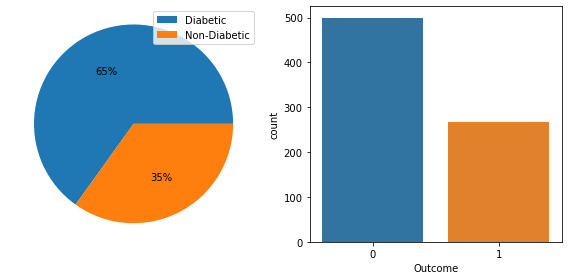

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# convert the outcome to a ctaegorical value

# df['Outcome_cat'] = df.Outcome.astype('category')
# for _ in df["Outcome"]:
#     if df["Outcome"].values() == 0:
#         df['Outcome_cat'] = Diabetic
#     else:
#         df['Outcome_cat'] = Not-Diabetic
# display(df)
# outcome
fig, (ax1, ax2) = plt.subplots(1, 2,figsize =(8, 4),
                        tight_layout = True)
labels=["Diabetic","Non-Diabetic"]
ax1.pie(df["Outcome"].value_counts(),autopct='%1.0f%%')
ax1.axis('equal')
ax1.legend( loc='upper right', labels=labels)

# #pregnancy
ax2 = sns.countplot(x="Outcome",data=df)
# ax2.texts(s=["Count","Outcome"])

# df['Pregnancies'].hist(bins=10, color='red',alpha=0.7)
# plt.bar(df['Outcome'],df['Outcome'].count)
# plt.xlabel('Outcome')
# plt.ylabel('Count')
# plt.title('Histogram of Outcome ')

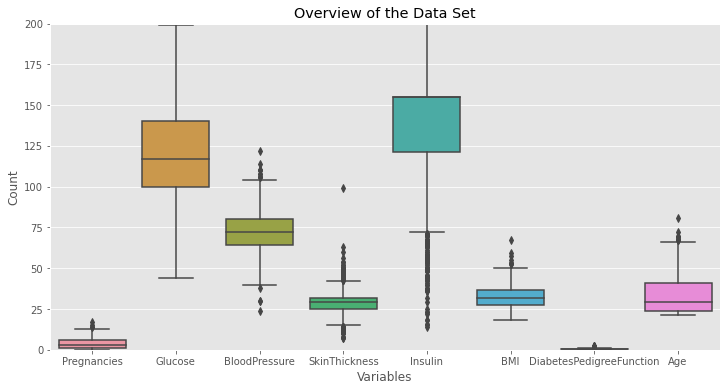

In [67]:
# box plot
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(12,6))
ax.set(ylim=(-.05, 200))
plt.xlabel('Variables')
plt.ylabel('Count')
plt.title("Overview of the Data Set")
ax = sns.boxplot(data = df)

In [4]:
# data preprocessing
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
# find the median and put it in
for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean())
    df[column] = df[column].replace(np.NaN, mean)
display(df.head(5))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [68]:
# More EDA
# find the corelation between the variables 
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.127957,0.208615,0.081770,0.055478,0.021546,-0.033523,0.544341
Glucose,0.127957,1.000000,0.218615,0.192677,0.420301,0.231470,0.137100,0.266591
BloodPressure,0.208615,0.218615,1.000000,0.191892,0.072041,0.281132,-0.002378,0.324915
SkinThickness,0.081770,0.192677,0.191892,1.000000,0.158133,0.543275,0.102188,0.126107
Insulin,0.055478,0.420301,0.072041,0.158133,1.000000,0.166946,0.099170,0.136050
BMI,0.021546,0.231470,0.281132,0.543275,0.166946,1.000000,0.153506,0.025744
DiabetesPedigreeFunction,-0.033523,0.137100,-0.002378,0.102188,0.099170,0.153506,1.000000,0.033561
Age,0.544341,0.266591,0.324915,0.126107,0.136050,0.025744,0.033561,1.000000


In [5]:
# Model building
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
#Evaluation using Accuracy score
from sklearn import metrics
#Set the parameters to train on
X=df.drop('Outcome', axis=1)
y=df['Outcome']
#split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [6]:
# model training
#create a decision tree classier
# we are creating two of the to compare the information gain 
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf_gini = DecisionTreeClassifier(criterion="gini",max_depth=5)
# fir the models with same data
clf.fit(X,y)
clf_gini.fit(X,y)


DecisionTreeClassifier(max_depth=5)

In [7]:
# Evaluating betwen the two models
#get predicions from the model
y_pred = clf.predict(X_test)
y_pred_gini = clf.predict(X_test)

# compare the two information gain model accuracy score
print(f"Entropy  score: {clf.score(X,y)}")
print(f"Gini  score: {clf_gini.score(X,y)}")
# Prediction Accuracy
print("Entropy Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("Gini Accuracy:",metrics.accuracy_score(y_test, y_pred_gini)*100)

Entropy  score: 0.83203125
Gini  score: 0.828125
Entropy Accuracy: 83.54978354978356
Gini Accuracy: 83.54978354978356


# Deployment
Pickle the model and export to for production

In [8]:
# serialize the model
import pickle
pickle.dump(clf,open("../model.pkl","wb"))